In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
from dataset import CropInfoDataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
src_dir = Path('./dataset_test.ipynb').resolve().parents[1]
rgb_image_dir = src_dir / 'data' / 'rgb_images'
infrared_image_dir = src_dir / 'data' / 'thermal_data_processed'
T_moisture_data_file_path = src_dir / 'data' / 'series_data' / 'T_moisture_data.csv'
sapflow_data_file_path = src_dir / 'data' / 'series_data' / 'sapflow_data.CSV'
labels_file_path = src_dir / 'data' / 'labels' / 'soil_water_content.CSV'

dataset = CropInfoDataset(
        rgb_images_directory=rgb_image_dir, 
        # infrared_images_directory=infrared_image_dir, 
        # T_moisture_data_file_path=T_moisture_data_file_path,
        # sap_flow_data_file_path=sapflow_data_file_path,
        labels_file_path=labels_file_path,
        transform=ToTensor()
    )

In [6]:
print(len(dataset.rgb_images))
print(len(dataset.labels))
print(dataset.rgb_images)
print(dataset.labels)

322
322
[WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/1.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/11.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/22.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/34.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/17.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/32.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/2.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/28.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/10.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/16.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/7.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/19.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/30.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4/20.JPG'), WindowsPath('E:/onedrive/桌面/毕业设计/算法/data/rgb_images/11-4

In [3]:
print(len(dataset))
count = 0
for data in dataset:
    print(data)
    break

15
[tensor([[[0.7608, 0.7569, 0.7647,  ..., 0.7765, 0.7843, 0.7961],
         [0.7608, 0.7608, 0.7647,  ..., 0.7804, 0.7882, 0.7922],
         [0.7686, 0.7686, 0.7686,  ..., 0.7882, 0.7922, 0.8039],
         ...,
         [0.2353, 0.2353, 0.2431,  ..., 0.8549, 0.8549, 0.8510],
         [0.2392, 0.2314, 0.2353,  ..., 0.8549, 0.8549, 0.8510],
         [0.2353, 0.2314, 0.2157,  ..., 0.8549, 0.8627, 0.8588]],

        [[0.6863, 0.6824, 0.6941,  ..., 0.6667, 0.6745, 0.6745],
         [0.6941, 0.6941, 0.6980,  ..., 0.6784, 0.6784, 0.6824],
         [0.7020, 0.6941, 0.6941,  ..., 0.6784, 0.6824, 0.6941],
         ...,
         [0.1804, 0.1804, 0.1804,  ..., 0.7294, 0.7294, 0.7176],
         [0.1843, 0.1765, 0.1804,  ..., 0.7216, 0.7294, 0.7255],
         [0.1804, 0.1765, 0.1804,  ..., 0.7294, 0.7373, 0.7333]],

        [[0.5176, 0.5137, 0.5137,  ..., 0.4784, 0.4863, 0.4902],
         [0.5137, 0.5137, 0.5176,  ..., 0.4863, 0.4902, 0.4941],
         [0.5294, 0.5255, 0.5255,  ..., 0.4824, 0.4941

In [4]:
rgb_image, infrared_image, T_moisture, sapflow, label, have_or_not = data


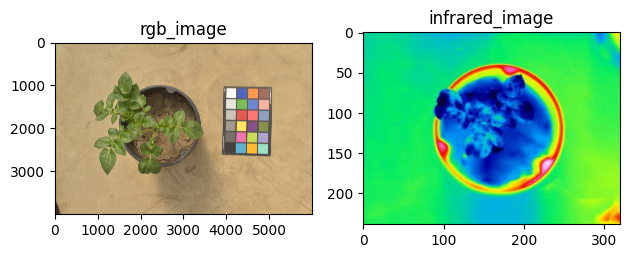

In [5]:
rgb_image_np = rgb_image.numpy().transpose(1,2,0)
infrared_image_np = infrared_image.numpy().transpose(1,2,0)

fig, axs = plt.subplots(1,2)
axs[0].imshow(rgb_image_np)
axs[0].set_title('rgb_image')
axs[1].imshow(infrared_image_np)
axs[1].set_title('infrared_image')
plt.tight_layout()
plt.show()

torch.Size([76, 3])


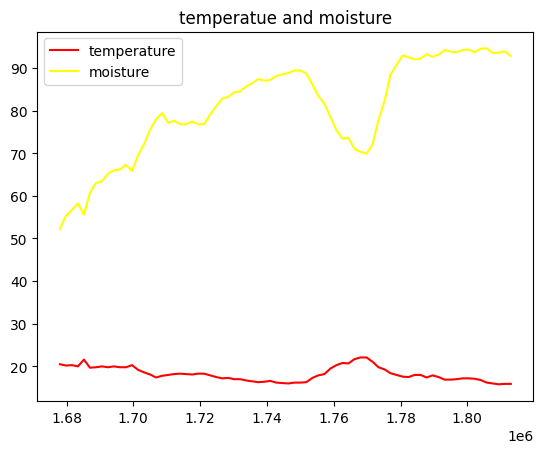

In [6]:
print(T_moisture.shape)
t = T_moisture[:, 0].numpy()
T = T_moisture[:, 1].numpy()
moisture = T_moisture[:, 2].numpy()
plt.clf()
plt.plot(t, T, color='red', label='temperature')
plt.plot(t, moisture, color='yellow', label='moisture')
plt.title('temperatue and moisture')
plt.legend()
plt.show()


torch.Size([25, 2])


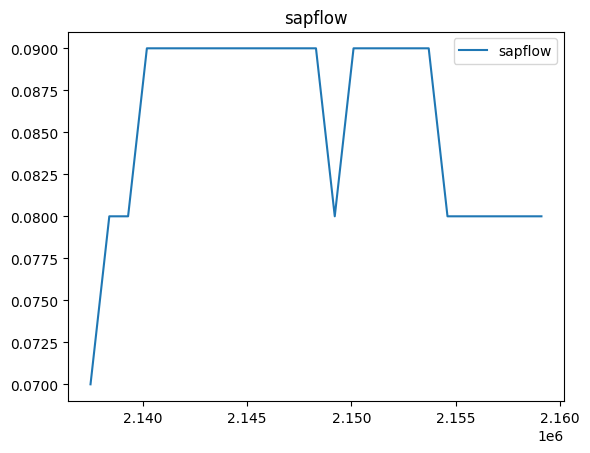

In [7]:
print(sapflow.shape)
t = sapflow[:, 0].numpy()
sapflow_value = sapflow[:, 1].numpy()
plt.clf()
plt.plot(t, sapflow_value, label='sapflow')
plt.title('sapflow')
plt.legend()
plt.show()

In [9]:
print(label)

tensor(22.5700)


In [8]:
print(len(dataset))
INDEX_2_NAME = ['rgb_image', 'infrared_image', 'T_moisture', 'sapflow', 'label']
count = [0 for _ in range(5)]
at_least_one_data_count = 0
rgb_and_label_in_count = 0
for data in dataset:
    have_or_not = data[-1]
    if have_or_not[0] and have_or_not[4]:
        rgb_and_label_in_count += 1
    if any(have_or_not[:4]):
        at_least_one_data_count += 1
    for i in range(5):
        if have_or_not[i]:
            count[i] += 1
for i in range(5):
    print(f'{INDEX_2_NAME[i]}: {count[i]}')
print('at_least_one_dat_count:', at_least_one_data_count)
print('rgb_and_label_in_count:', rgb_and_label_in_count)

15
rgb_image: 15
infrared_image: 15
T_moisture: 15
sapflow: 15
label: 15
at_least_one_dat_count: 15
rgb_and_label_in_count: 15
